In [1]:
import numpy as np
import os
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from keras import layers

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
def concatenate_files_from_folders(folder_paths):
    arrays = []
    for folder_path in folder_paths:
            # List all .npy files in the folder
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.npy') and file_name!='seq_D0X_full.npy':
                    file_path = os.path.join(folder_path, file_name)
                    # Load the .npy file and append it to the list
                    arrays.append(np.load(file_path))
    # Concatenate all arrays along the first axis
    concatenated_data = np.concatenate(arrays, axis=0)
    return concatenated_data

In [3]:
folder_1 = 'Dataset/Batch4/seq_skeleton'
#folder_2 = 'Dataset/Batch3/seq_skeleton'

In [4]:
data = concatenate_files_from_folders([folder_1])

In [5]:
#extracting data
x_data = data[:, :, :-1]
labels = data[:, 0, -1]
y_data = labels
x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)
#train test splot
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.55, random_state=2024)

In [6]:
model = load_model('Trained Models/dynamic/1_temporal_transformer_quad_noD0X.h5')

1691/1691 [==============================] - 110s 65ms/step


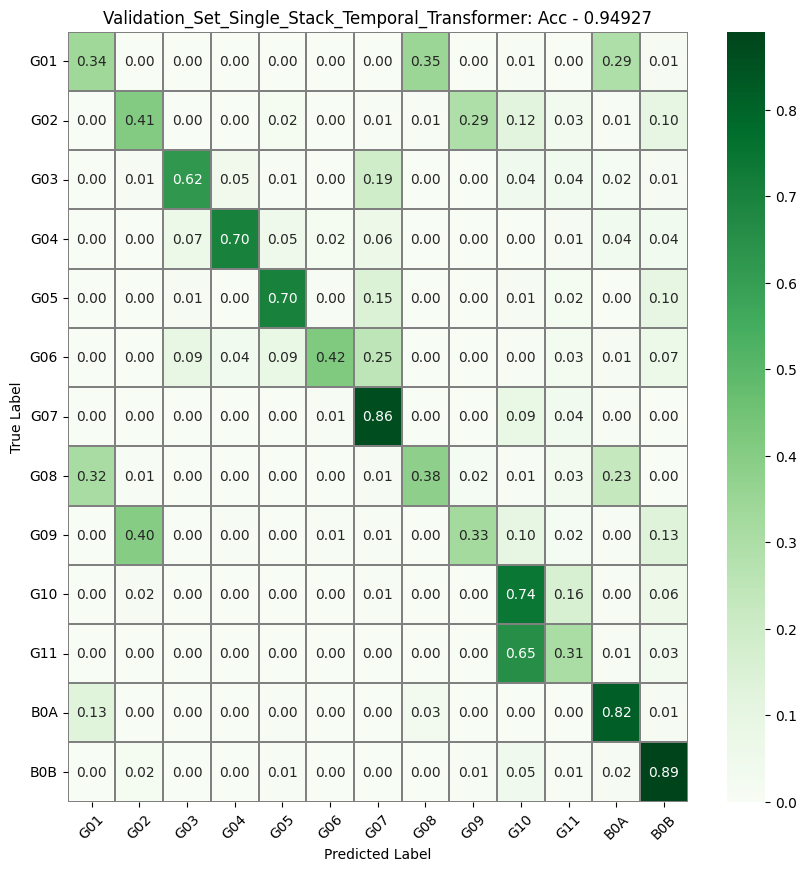

In [7]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# Define the actions (class names)
actions = ['G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'B0A', 'B0B']

# Predict the classes
Y_pred = model.predict(x_val)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = y_val

# Compute the confusion matrix
confusion_mtx = metrics.confusion_matrix(Y_true, Y_pred_classes, normalize='true')

# Plot the confusion matrix
f, ax = plt.subplots(figsize=(10, 10))  # Adjusted the size for better readability
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt='.2f', 
            xticklabels=actions, yticklabels=actions, ax=ax)

# Set axis labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Validation_Set_Single_Stack_Temporal_Transformer: Acc - 0.94927')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.yticks(rotation=0)
plt.savefig('Figures/Validation_Dual_Stack_Temporal_Transformer_quad_noD0X.jpg')
# Show the plot
plt.show()


In [8]:
model.evaluate(x_val,y_val)

1691/1691 [==============================] - 108s 64ms/step - loss: 1.7396 - sparse_categorical_accuracy: 0.7627


[1.7396125793457031, 0.7626645565032959]